In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_theme()
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

# Testing For Stationarity In Time Series

In [5]:
import pandas as pd
import quandl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [4]:
QUANDL_KEY = ''
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD', start_date='2012-01-01', end_date='2023-12-31')
df.rename(columns={'Value':'price'}, inplace=True)
df = df.resample('M').last()

1- Define a function for running the `ADF test`

* `Augmented Dickey Fuller test (ADF Test)` is a common statistical test used to test whether a given Time series is stationary or not. \
It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series. (Prabhakaran Selva, machinelearningplus)

In [6]:
def adf_test(x):
    '''
        Function for performing the Augmented Dickey-Fuller test for stationarity

        Null Hypothesis: time series is not stationarity
        Alternate Hypothesis: time series is stationarity

        Parameters
        ----------

        x : pd.Series / np.array
        The time series to be checked for stationarity

        Returns
        -------
        results : pd.DataFrame
        A DataFrame with the ADF test's results
    '''

    indices = ['Test Statistic', 'p-value', '# of Lags Used', '# of Observation Used']

    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)

    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results

In [7]:
adf_test(df.price)

Test Statistic           -1.950970
p-value                   0.308476
# of Lags Used            5.000000
# of Observation Used    92.000000
Critical Value (1%)      -3.503515
Critical Value (5%)      -2.893508
Critical Value (10%)     -2.583824
dtype: float64

2- Define a funtion for running the `KPSS test`

* `Kwiatkowski-Phillips-Schmidt-Shin (KPSS test)` is a statistical test to check for stationarity of a series around a deterministic trend. \
Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series. \
However, it has couple of key differences compared to the ADF test in function and in practical usage. \
Therefore, is not safe to just use them interchangeably. We’ll discuss this detail with simplified examples. (Prabhakaran Selva, machinelearningplus)

In [8]:
def kpss_test(x, h0_type='c'):
    '''
        Funtion for performing the Kwiatkowski-Phillips-Schmidt-Shin test for stationarity

        Null Hypothesis: time series is stationarity
        Alternate Hypothesis: time series is not stationarity

        Parameters
        ----------
        
        x : pd.Series/np.array
        The time series to be checked for stationarity

        h0_type : str('c', 'ct')
        Indicates the null hypothesis of the KPSS test:
            * 'c': The data is stationarity around a constant(default)
            * 'ct': The data is stationarity around the trend

        Returns
        -------
        results : pd.DataFrame
        A DataFrame with the KPSS test's results
    '''

    indices = ['Test Statistic', 'p-value', '# of Lags']

    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)

    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results

In [9]:
kpss_test(df.price)

Test Statistic           0.531962
p-value                  0.034468
# of Lags                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

3- Generate the ACF/PACF plots

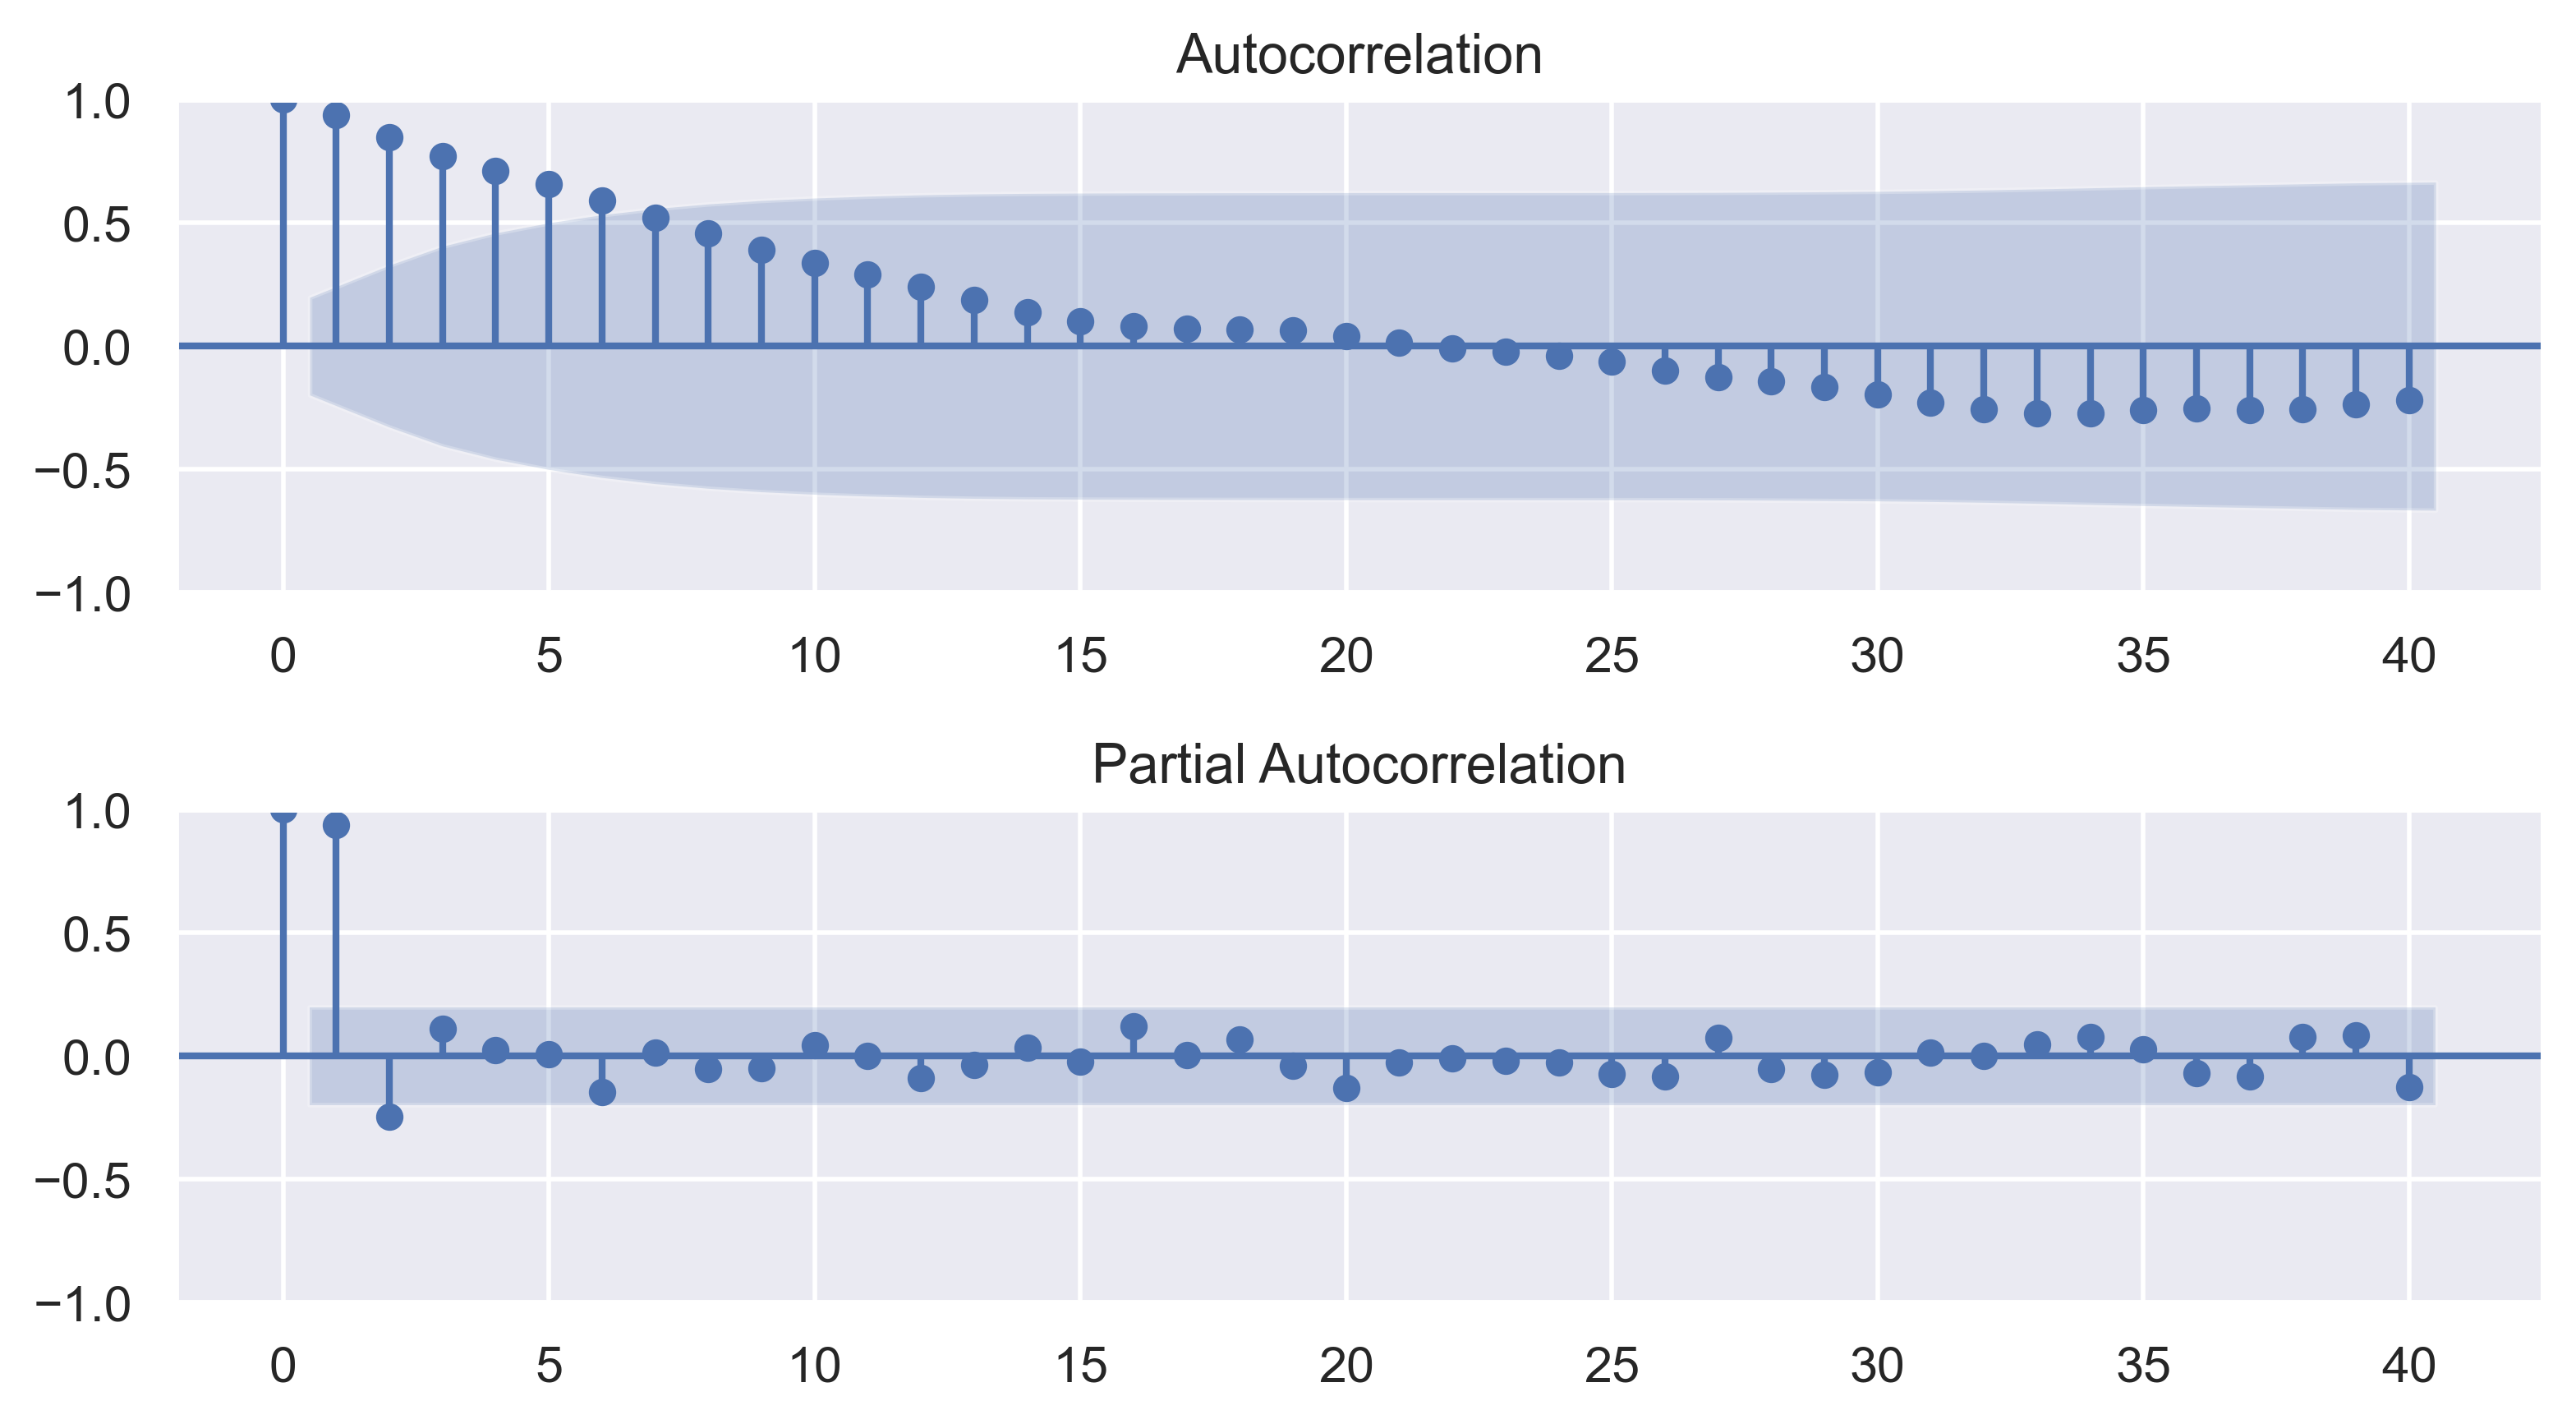

In [11]:
N_LAGS = 40
SIGNIFICANCE_LEVEL = 0.05

fig, ax = plt.subplots(2, 1)
plot_acf(df.price, ax=ax[0], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plot_pacf(df.price, ax=ax[1], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)

#plot
plt.tight_layout()
plt.show()